In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Rtl_data = pd.read_excel(r'C:\Users\APPLE\Desktop\Round 1 Assignment\sales_data.xlsx')
Rtl_data

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00


In [3]:
Rtl_data.shape

(5000, 40)

In [7]:
Rtl_data.isnull().sum(axis=0)

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

In [5]:
Rtl_data.REVENUE.min()

38.5

In [6]:
Rtl_data.CARRIAGE_REVENUE.min()

0.0

In [8]:
Rtl_data.TOTAL_ORDERS.min()

1

In [16]:
Rtl_data.LATEST_ORDER_DATE.max()

Timestamp('2021-10-24 00:00:00')

In [10]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [11]:
#recency = Latest Date - Last Invoice Date
#Frequency = count of invoice no. of transations
#monetary = Sum of Total of each customer 

import datetime as dt 

In [17]:

Latest_Date = dt.datetime(2021,10,25)

In [33]:
RFMScores = Rtl_data.groupby('CustomerID').agg({'LATEST_ORDER_DATE': lambda x:(Latest_Date - x.max()).days,'TOTAL_ORDERS':lambda x:x,'REVENUE':lambda x : x})
RFMScores

,LATEST_ORDER_DATE,TOTAL_ORDERS,REVENUE
CustomerID,,,
1,53,61,34847.40
2,94,59,32486.98
3,53,53,24178.97
4,5,84,18554.49
5,130,26,16884.99
...,...,...,...
248709,54,2,59.95
248710,119,2,59.94
259042,128,2,51.94


In [35]:
RFMScores.rename(columns={'LATEST_ORDER_DATE':'Recency',
                         'TOTAL_ORDERS':'Frequency',
                         'REVENUE': 'Monetary'},inplace=True)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,1,53,61,34847.40
1,2,94,59,32486.98
2,3,53,53,24178.97
3,4,5,84,18554.49
4,5,130,26,16884.99


In [36]:
RFMScores.Recency.describe()


count    5000.000000
mean       87.420000
std        80.156513
min         1.000000
25%         7.000000
50%        68.000000
75%       171.250000
max       207.000000
Name: Recency, dtype: float64

In [37]:
import seaborn as sns

C:\Users\APPLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


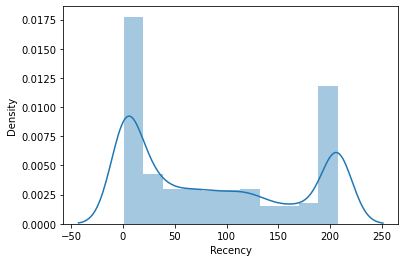

In [43]:
x = RFMScores['Recency']
ax = sns.distplot(x)
plt.show()

In [44]:
RFMScores.Frequency.describe()


count    5000.00000
mean       12.87040
std        12.67988
min         1.00000
25%         3.00000
50%         8.00000
75%        20.00000
max       156.00000
Name: Frequency, dtype: float64

C:\Users\APPLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


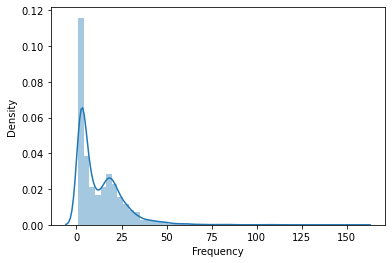

In [45]:
y = RFMScores.query('Frequency < 1000')['Frequency']

ay = sns.distplot(y)

In [46]:
RFMScores.Monetary.describe()

count     5000.000000
mean      1681.523840
std       1998.618678
min         38.500000
25%        315.097500
50%        966.725000
75%       2493.072500
max      34847.400000
Name: Monetary, dtype: float64

C:\Users\APPLE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


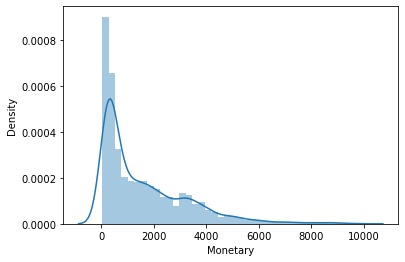

In [47]:
z = RFMScores.query('Monetary < 10000')['Monetary']
az = sns.distplot(z)

In [48]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()


In [49]:
quantiles

{'Recency': {0.25: 7.0, 0.5: 68.0, 0.75: 171.25},
 'Frequency': {0.25: 3.0, 0.5: 8.0, 0.75: 20.0},
 'Monetary': {0.25: 315.09749999999997, 0.5: 966.725, 0.75: 2493.0725}}

In [50]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [51]:
#calculate Add R,F an M segment value columns in the existing dataset to show R,F and M segement values 
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head() 

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
1,53,61,34847.40,2,1,1
2,94,59,32486.98,3,1,1
3,53,53,24178.97,2,1,1
4,5,84,18554.49,1,1,1
5,130,26,16884.99,3,1,1


In [52]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
1,53,61,34847.40,2,1,1,211,4
2,94,59,32486.98,3,1,1,311,5
3,53,53,24178.97,2,1,1,211,4
4,5,84,18554.49,1,1,1,111,3
5,130,26,16884.99,3,1,1,311,5


In [56]:
#Assign Loyalty Level to each customer 
Loyalty_Level = ['champions', 'Potential_customers','need_attention']
Score_cuts =pd.qcut(RFMScores.RFMScore,q=3,labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level']=Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1,53,61,34847.40,2,1,1,211,4,champions
1,2,94,59,32486.98,3,1,1,311,5,champions
2,3,53,53,24178.97,2,1,1,211,4,champions
3,4,5,84,18554.49,1,1,1,111,3,champions
4,5,130,26,16884.99,3,1,1,311,5,champions


In [64]:
#validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111 '].sort_values('Monetary',ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,4,5,84,18554.49,1,1,1,111,3,champions
1,17,6,36,12969.98,1,1,1,111,3,champions
2,22,1,124,11986.54,1,1,1,111,3,champions
3,29,1,82,11025.96,1,1,1,111,3,champions
4,35,5,32,9685.37,1,1,1,111,3,champions
5,36,7,42,9516.90,1,1,1,111,3,champions
6,40,6,26,9099.36,1,1,1,111,3,champions
7,41,2,44,9006.15,1,1,1,111,3,champions
8,46,6,43,8854.30,1,1,1,111,3,champions
9,48,6,107,8774.63,1,1,1,111,3,champions
